<a href="https://colab.research.google.com/github/gokulbot/Regression-ai1-fall2019/blob/master/lab_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Multiple Ways

## Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [0]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       coef=True)

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

In [74]:
X.shape

(100, 1)

In [75]:
X


array([[ 0.03225343],
       [-0.43717257],
       [-0.14039799],
       [-0.28942671],
       [-1.43048995],
       [-0.86109055],
       [-0.95908022],
       [-0.52824237],
       [-0.18007786],
       [ 1.81894788],
       [-1.50157469],
       [ 1.07524045],
       [-0.53757079],
       [-0.33654744],
       [-0.69333384],
       [ 0.18613021],
       [-0.35285906],
       [-0.59573347],
       [-0.95284841],
       [ 1.37214258],
       [-1.00148098],
       [ 0.59405599],
       [ 1.98893004],
       [-0.84764818],
       [ 0.21276995],
       [-0.86352344],
       [-0.44574656],
       [-1.08669572],
       [ 0.88578638],
       [-0.39457786],
       [-0.75808346],
       [ 0.21445342],
       [-0.91772873],
       [ 1.18192126],
       [-1.23456807],
       [ 1.51028721],
       [ 0.36908201],
       [ 0.07800759],
       [ 0.92827925],
       [ 0.91180261],
       [ 0.50541435],
       [ 0.39476163],
       [-1.40727442],
       [ 1.33682587],
       [ 0.28914398],
       [ 0

We are fitting a model with an intercept. Lets see what it is.

In [4]:
coef

array(80.88336208)

We can plot the data.

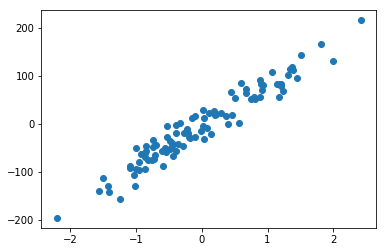

In [76]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [0]:
xgrid = np.linspace(-2.5,2.5,1000)
Xgrid = xgrid.reshape(-1,1)

In [78]:

Xgrid.shape

(1000, 1)

In [79]:
xgrid.shape

(1000,)

! look at above

## Fit using sklearn

In [0]:
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

(array([82.90456142]), -3.709228868670302)

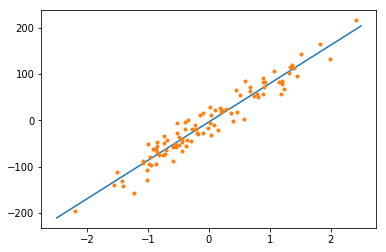

In [15]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [0]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y, lr.predict(X))

0.9342344891672815

## The impact of sample size

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [63]:
sample_indices = np.random.choice(range(100), size=20)
sample_indices

array([50, 93, 91, 70, 47, 94, 71, 10, 52, 60, 88, 51, 12, 19, 31, 72,  3,
       69, 89, 36])

In [0]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

In [70]:
lr_s = LinearRegression().fit(Xsample, ysample)
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)
#both same similar manner for the same thing

(0.04841381445013293, 0.04841381445013293)

Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times

(0, 1)

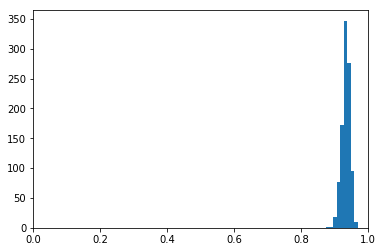

In [87]:
scores = []
slope= []

for i in range(1000):
    sample_indices = np.random.choice(range(100), size=100)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
    slope.append(lr.coef_[0])
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0,1)

Redo this with a higher amount of noise (about 400). For this you will need to create a new dataset. Plot the data. Plot the histogram of the R^2 as well as that of the coefficients.Try a smaller dataset as well. What conclusions can you draw?

In [0]:
# your code here
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=400,
                       random_state=2017,
                       coef=True)


In [35]:
# your code here
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

(array([121.30734871]), -74.18457737340603)

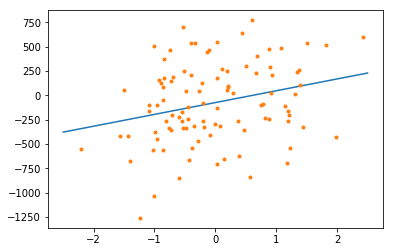

In [36]:
# your code here
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')



In [38]:
sample_indices = np.random.choice(range(100), size=20)
sample_indices

array([83, 90,  8, 90, 15, 62, 29, 15, 83, 33, 55, 51, 75, 47, 82, 30, 81,
       50, 58, 88])

In [0]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

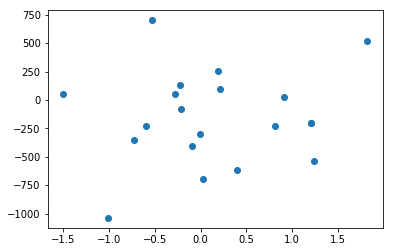

In [49]:
plt.plot(Xsample,ysample, 'o');

In [40]:
lr_s = LinearRegression().fit(Xsample, ysample)
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)
#both same similar manner for the same thing



(0.023975822886646014, 0.02397582288664601)

In [48]:
lr = LinearRegression()
lr.fit(Xsample,ysample)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(0, 1)

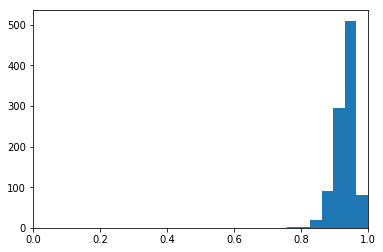

In [88]:
# your code here
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(lr.fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.0, 1, 30))
plt.xlim(0,1)


In [56]:
for i in range(5):
    sample_indices = np.random.choice(range(20), size=20,replace=True)
    print(sample_indices)

[12  4  2 16  7 16  8 19 11 13 19 17 15  4  1  0 12 12  2  5]
[11 11 10  0  2 13  7 17  4 11  8  2  9  2  4 16  2 11  7 19]
[ 4  2  4 12  7  1 15  7  7  5  1  8 15  7 12  2  1 18 19 18]
[ 9 13  0  2 17 16  4 14  2 14 17 15  6 10  4 11 14 16 13 14]
[19 11  6  6 17  4 17 11  4 16 11 17  2 14 11  9 11  8  2 18]


(0.7, 1)

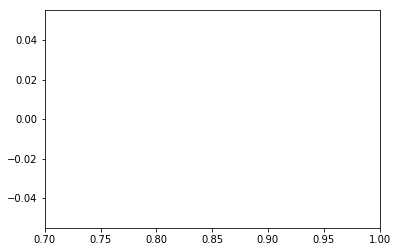

In [60]:
# your code here
#resampling
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=100,replace=True)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)


## Testing and training

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2017)

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [0]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr.predict(Xtest))
r2_train = r2_score(ytrain, lr.predict(Xtrain))

In [0]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

## Using Keras to fit the model

We'll use plain and simple gradient descent (why?) and Keras's Sequential API

In [0]:
from keras.models import Sequential
from keras.layers import Dense
lr3 = Sequential()
lr3.add(Dense(1, input_shape=(1,)))
lr3.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
lr3.summary()

In [0]:
history = lr3.fit(Xtrain, ytrain, epochs=400, batch_size=80)

In [0]:
plt.plot(history.history['loss'])

In [0]:
lr3.get_weights()

### Using the Keras Functional API



In [0]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_placeholder = Input(shape=(1,))
outputs_placeholder = Dense(1, activation='linear')(inputs_placeholder)

m = Model(inputs=inputs_placeholder, outputs=outputs_placeholder)
m.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
m.summary()

In [0]:
history2 = m.fit(Xtrain, ytrain, epochs=250, batch_size=80)

In [0]:
m.get_weights()